# "Homework Development
## PH 212 COCC
### Bruce Emerson 6/6/2020

In broad strokes what I want to do is create a python tool that allows me to pose certain classes of physics problems where I can randomly generate values or settings for students to practice their skills. If I can generate similar problems with different numbers then each student can practice their calculational skills in a meaningful way. To do this I need to be able to code the calculation of the 'answer' but keep that answer unavailable to the students. This is the crux of the challenge.

## Dependencies

This is my usual spectrum of dependencies that seem to be generally useful. We'll see if I need additional ones.

In [1]:
import numpy as np
from decimal import Decimal
import matplotlib as mplot
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply
from numpy.random import default_rng
rng = default_rng()

## Random charge generator for problems

I'm having an interesting problem generating the kind of distribution of possible charge values that I would like. If I want a charge value from 1 nC to 1 mC you might think that I just pick a random integer between 1 and $10^9$ and it would be good. Doesn't work so well because most of the possible integers are at the upper end of the range. I can generate a number between 1 and 100 pretty uniformly and then pick an exponent. Perhaps that will work better. Let's see.

In [12]:
chargesize = rng.integers(1,100) # generate an integer 
exponent = rng.integers(3,10) # generate an exponent

charge = np.float(chargesize)*10.**(-exponent)
print("Charge is: %.2E" % Decimal(charge))

Charge is: 4.20E-07


In [16]:
# get student result
print("Enter the magnitude of the force in N")
print("Enter in the form 34.5E+03 or 5.6E-04")
studentresult = float(input("Enter your result: "))
print(studentresult)

Enter the magnitude of the force in N
Enter in the form 34.5E+03 or 5.6E-04


Enter your result:  65.44E-6


6.544e-05


In [9]:

numbers = [0., 0., 0., 0.]
numbers = np.random.randint(low=1, high=100, size=4)
#print(numbers)
result = numbers[0]+numbers[1]+numbers[3]
#print(result)

In [3]:
myresult = float(input("Enter your result: "))

if myresult == result:
    print("Yay, you got it right!")
else:
    print("Oops, better try again")


#print("value of myresult: ", myresult)
#print("type of myresult: ", type(myresult))

Enter your result:  4


Oops, better try again


## Data Entry (Lists/Vectors) (Deliverable I)

At this point you should be getting comfortable doing data entry. You should explain what the data is and how you gathered it in this markdown cell. You should also indicate the variability of your data (x and y). You are asked to figure out a way to present your data here in the markdown cell and **not** just as a list in the code below.

In [14]:
timedata = [0., .46, .73, .95, 1.11, 1.27]
heightdata = [0., 1., 2., 3., 4., 5.]

# 2 ways to print out and check your data

print("flight time:",timedata)
print("height:",heightdata)

timedatalength = len(timedata)
heightdatalength = len(heightdata)
# length counts how many 'data points' in the list
print("number of data points (x):", timedatalength)
print("number of data points (y):", heightdatalength)

flight time: [0.0, 0.46, 0.73, 0.95, 1.11, 1.27]
height: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
number of data points (x): 6
number of data points (y): 6


### Data Plot

If you are unsure what is happening here refer to earlier labs where it has been described in more detail. 



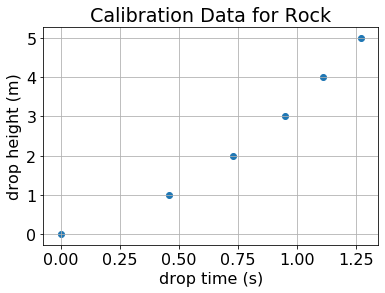

In [15]:

fig, ax = plt.subplots()
ax.scatter(timedata, heightdata)

plt.rcParams.update({'font.size': 16}) # make labels easier to read
ax.set(xlabel='drop time (s)', ylabel='drop height (m)',
       title='Calibration Data for Rock')
ax.grid()

#fig.savefig("myplot.png")
plt.show()

### Curve Fitting

The new feature for this lab is fitting a polynomial curve to the data and trying to make sense of it.

```degree``` is the order of the polynomial as in degree = 2 => quadratic polynomial with 3 coefficients.

[polynomial.polynomial.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyfit.html)

Read the documentation and see if you can figure out what is happening in this code block.

In [18]:
degree = 3
coefs = ply.polyfit(timedata, heightdata,degree)
print("Coefficients of polynomial fit:", coefs)

array([4.95953095e-04, 1.33248627e+00, 1.69276832e+00, 2.87887672e-01])

### Add the physics model...the curve fit and the ideal rock

The model we will create here is not a linear model but it starts the same way by generating a set of 'x' values from which to generate the 'y' values give the curve fit generated above.

It starts by defining a set of x values.```numpy.linspace()``` is a tool for doing this and because we did ```import numpy as np``` it shows in the code as ```np.linspace()```. Look back to previous labs if you need to refresh.

[numpy.linspace documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) 

Because it's interesting to see and not hard to do when you have access to a notebook I've included the model of an ideal rock. You can worry if you want about whether gravity in Bend is different than sea level (it is a little) but the relationship of your data, the curve fit, and the ideal rock should make sense.


In [39]:
# generate x values for model of data
maxtime = 2.0
numpoints = 20
modeltime = np.linspace(0.,maxtime,numpoints)

# create a model height list that matches the model time
modelheight = np.full_like(modeltime,0)
idealrock = np.full_like(modeltime,0)

# calculate the heights predicted from the model
for i in range (0,numpoints):
    modelheight[i] = coefs[0] + coefs[1]*modeltime[i] + \
        coefs[2]* modeltime[i]**2 + coefs[3]*modeltime[i]**3
    idealrock[i] = 0.5*9.81*modeltime[i]**2

# print("testing the output of the loop;", modelheight)

### Plot Data with Model (Deliverable II)

Just like we've done previously with different labels etc etc

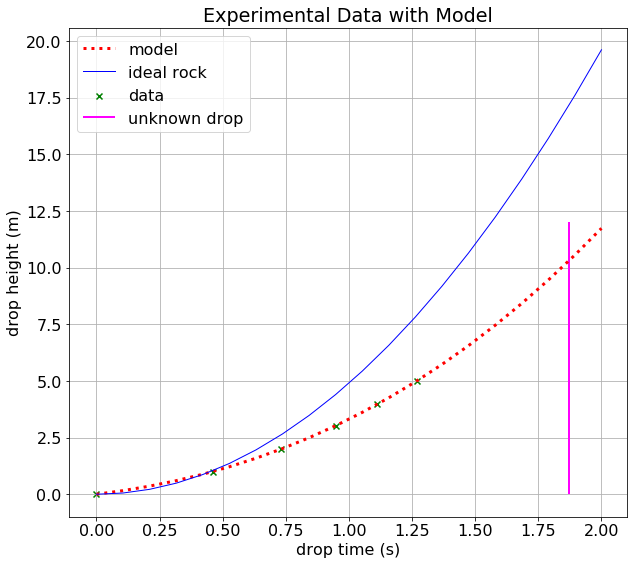

In [50]:
fig2, ax2 = plt.subplots()
ax2.scatter(timedata, heightdata,
            marker = 'x', color = 'green',
            label = "data")
ax2.plot(modeltime, modelheight,
         color = 'red', linestyle = ':',
         linewidth = 3., label = "model")
ax2.plot(modeltime, idealrock,
         color = 'blue', linestyle = '-',
         linewidth = 1., label = "ideal rock")

unknown_data = 1.87
ax2.vlines(unknown_data, 0, 12,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "unknown drop")

plt.rcParams.update({'font.size': 16}) # make labels easier to read
ax2.set(xlabel='drop time (s)', ylabel='drop height (m)',
       title='Experimental Data with Model')

fig2.set_size_inches(10, 9)
ax2.grid()

plt.legend(loc= 2)
plt.show()

### Terminal Velocity? (Deliverable III)

Does this data and the model suggest that your 'rock' has reached terminal velocity during this experiment? Why or why not? What would that terminal velocity be? 

### Challnege Drop

Here is space to enter your measure drop time for the unknown height. From this data point and your model above predict the height of the unknown object and a numerical value for your uncertainty based on your data. I drew a line on the previous plot indicating the drop time for the unknown which you can of course edit. The intersection point on the plot should be consistent with the predicted height found below by plugging your drop time for the unknown height into the polynomial fit.